In [1]:
#pip install scikit-image

## 1. Read the picture S2_2.

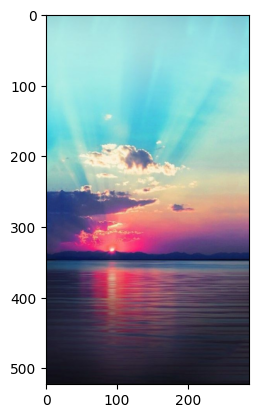

In [4]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
img = io.imread('S2_2.png')
plt.imshow(img)

## 2. Print out the observed shape of the image

In [5]:
img.shape

(523, 287, 3)

## 3. Show Vertically One-third of the image in Green next one-third in Red and the last one third in Blue

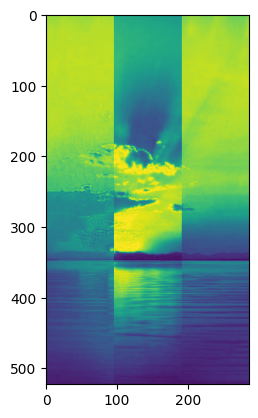

In [6]:
Picture = np.zeros([523, 287])
Picture[: , :96] = img[:, :96, 2]
Picture[: , 96:192] = img[: , 96:192, 0]
Picture[: , 192:] = img[:, 192:, 1]
plt.imshow(Picture)
plt.show()

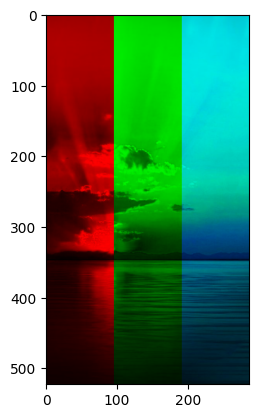

In [7]:
Picture = io.imread('S2_2.png')
Picture[: , :96, 1:] = 0
Picture[: , 96:192,0] = 0
Picture[: , 96:192,2] = 0
Picture[: , 192:,:1] = 0
plt.imshow(Picture)
plt.show()

## 4. Tilt the image horizontally horizontal lines on the image (by matrix transformation)

In [10]:
V1 = np.array([[1,1,0],[0,1,0],[0,0,1]])
V1

array([[1, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

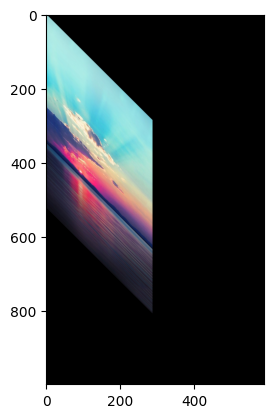

In [9]:
img_V = np.zeros((1000, 590, 3), dtype=np.uint8)
for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j, :]
        input_coords = np.array([i, j, 1])
        #print(input_coords)
        i_out, j_out, _ = (V1 @ input_coords).astype(int)
        img_V[i_out, j_out, :] = pixel_data
plt.imshow(img_V)
plt.show()

## 5. Draw vertical lines on the image (by matrix transformation)

In [ ]:
V1 = np.array([[1,0,0],[0,2,0],[0,0,1]])

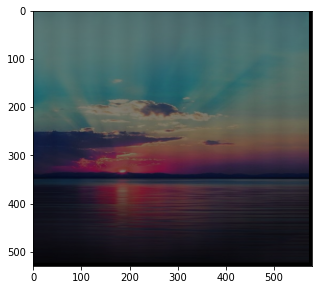

In [ ]:
img_transformed = np.zeros((530, 580, 3), dtype=np.uint8)
for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j, :]
        input_coords = np.array([i, j, 1])
        #print(input_coords)
        i_out, j_out, _ = (V1 @ input_coords).astype(int)
        img_transformed[i_out, j_out, :] = pixel_data

plt.figure(figsize=(5, 5))
plt.imshow(img_transformed)

## 6. Scale down the image by one-fourth

In [ ]:
H1 = np.array([[1/4,0,0],[0,1/4,0],[0,0,1/4]])
#img_H = H1 @ img
#plt.imshow(img_H)
#plt.show()

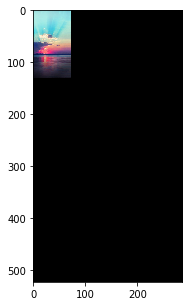

In [ ]:
img_transformed = np.zeros((523, 287, 3), dtype=np.uint8)
for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j, :]
        input_coords = np.array([i, j, 1])
        #print(input_coords)
        i_out, j_out, _ = (H1 @ input_coords).astype(int)
        img_transformed[i_out, j_out, :] = pixel_data

plt.figure(figsize=(5, 5))
plt.imshow(img_transformed)

## OR

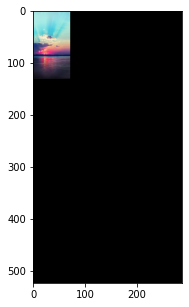

In [ ]:
def get_scale(s):
    return np.array([
        [s, 0, 0],
        [0, s, 0],
        [0, 0, 1]
])

S1 = get_scale(1/4)

img_transformed = np.zeros((523, 287, 3), dtype=np.uint8)
for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j, :]
        input_coords = np.array([i, j, 1])
        #print(input_coords)
        i_out, j_out, _ = (S1 @ input_coords).astype(int)
        img_transformed[i_out, j_out, :] = pixel_data

plt.figure(figsize=(5, 5))
#288, 512
plt.xlim(0,287)
plt.ylim(523,0)
plt.imshow(img_transformed)

## 7. Rotate the image side-wise

In [41]:
# Define Transformations
def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([[np.cos(angle), -np.sin(angle), 0],
                     [np.sin(angle), np.cos(angle), 0],
                     [0, 0, 1]])

In [42]:
R1 = get_rotation(90)

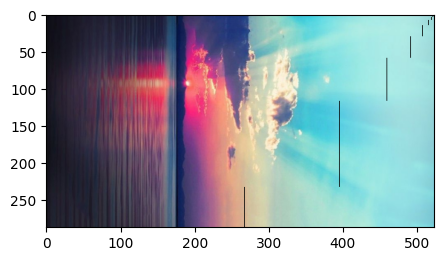

In [43]:
img_transformed = np.zeros((287, 523, 3), dtype=np.uint8)

for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j, :]
        input_coords = np.array([i, j, 1])
        #print(input_coords)
        i_out, j_out, _ = (R1 @ input_coords).astype(int)
        img_transformed[i_out, j_out, :] = pixel_data

plt.figure(figsize=(5, 5))
plt.imshow(img_transformed)

## 8. Make a mirror image of the actual pictual picture

In [ ]:
M1 = np.array([[1, 0, 0],[0, -1, 0],[0, 0, 1]])

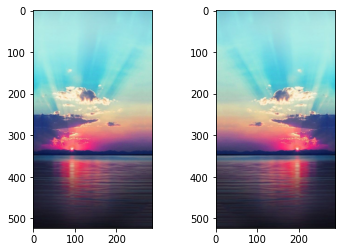

In [ ]:
img_transformed = np.zeros((523, 287, 3), dtype=np.uint8)

for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j, :]
        input_coords = np.array([i, j, 1])
        #print(input_coords)
        i_out, j_out, _ = (M1 @ input_coords).astype(int)
        img_transformed[i_out, j_out, :] = pixel_data

fig = plt.figure()        
fig.add_subplot(1,2,1)
plt.imshow(img)

fig.add_subplot(1,2,2)
plt.imshow(img_transformed)



## 9. Intensify the image

In [ ]:
sharp_filter = np.array([[0,0,0], [0, 20, 0], [0,0,0]])

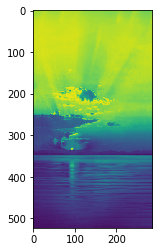

In [ ]:
sharp_image = np.zeros((523, 287, 3), dtype=np.uint8)
image_sharp=[]

for i, row in enumerate(img):
    for j, col in enumerate(row):
       
        pixel_data = np.sum(np.multiply(img[i,j],sharp_filter)) # element-wise multiplication of two matrices
        image_sharp.append(pixel_data)

sharp_img = np.array(image_sharp)
sharp_image= sharp_img.reshape(523, 287)
#sharp_image = np.array(image_sharp)
plt.imshow(sharp_image)

## 10. Detect the edge of the actual Picture

In [ ]:
E1 = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])

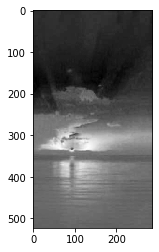

In [ ]:
hor_edge_image = np.zeros((523, 287, 3), dtype=np.uint8)
image_hor_edge=[]

for i, row in enumerate(img):
    for j, col in enumerate(row):
       
        pixel_data = np.sum(np.multiply(img[i,j],E1)) # element-wise multiplication of two matrices
        image_hor_edge.append(pixel_data)

hor_edge_image = np.array(image_hor_edge)
hor_edge= hor_edge_image.reshape(523, 287) 
plt.imshow(hor_edge, cmap='Greys_r')

##-------------------------------------------------Happy Learning-----------------------------------------------------------